<a href="https://colab.research.google.com/github/nelslindahlx/Data-Analysis/blob/master/TimelineofMajorFinancialBubbles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeline of Major Financial Bubbles

This chart visualizes significant historical and projected financial bubbles from **1637 to 2035**. Each bubble is represented along a horizontal timeline, with markers color-coded by category (e.g., commodities, finance, real estate, tech). Future bubbles are shown with hollow markers and dashed connectors to distinguish them from historical events.

## Key Features
- **Start Year**: The timeline begins at 1630, capturing the *Tulip Mania* as the first major recorded bubble.  
- **Historical Bubbles**: Includes events such as the *South Sea Bubble* (1720), *Railway Mania* (1840), *Wall Street Crash* (1929), *Japanese Asset Bubble* (1989), *Dot-Com Bubble* (2000), and the *Global Financial Crisis* (2008).  
- **Recent & Future Bubbles**: Covers the *Crypto & Meme Stocks* surge (2021) and projects potential *AI (2026)*, *Robotics (2029)*, and *Quantum (2035)* bubbles.  
- **Era Shading**: Background bands highlight major economic eras, including the **Industrial Revolution**, **Post-WWII Boom**, **Digital Age**, and a **Future** section.  
- **Clean Labeling**: Angled leader lines connect bubbles to labels, with collision avoidance logic ensuring readability even in dense modern periods.  

## Categories
- Commodities (orange)  
- Finance/Trade (purple)  
- Infrastructure (green)  
- Real Estate (brown/blue/green variants)  
- Tech & Speculative (red/crimson)  
- Education (gold)  
- Future bubbles use hollow markers with dashed lines  

## Purpose
The visualization highlights the recurring nature of speculative manias across centuries and industries, showing how financial bubbles have shifted domains over time—from tulips and railways to dot-coms, crypto, and emerging technologies like AI, robotics, and quantum computing.

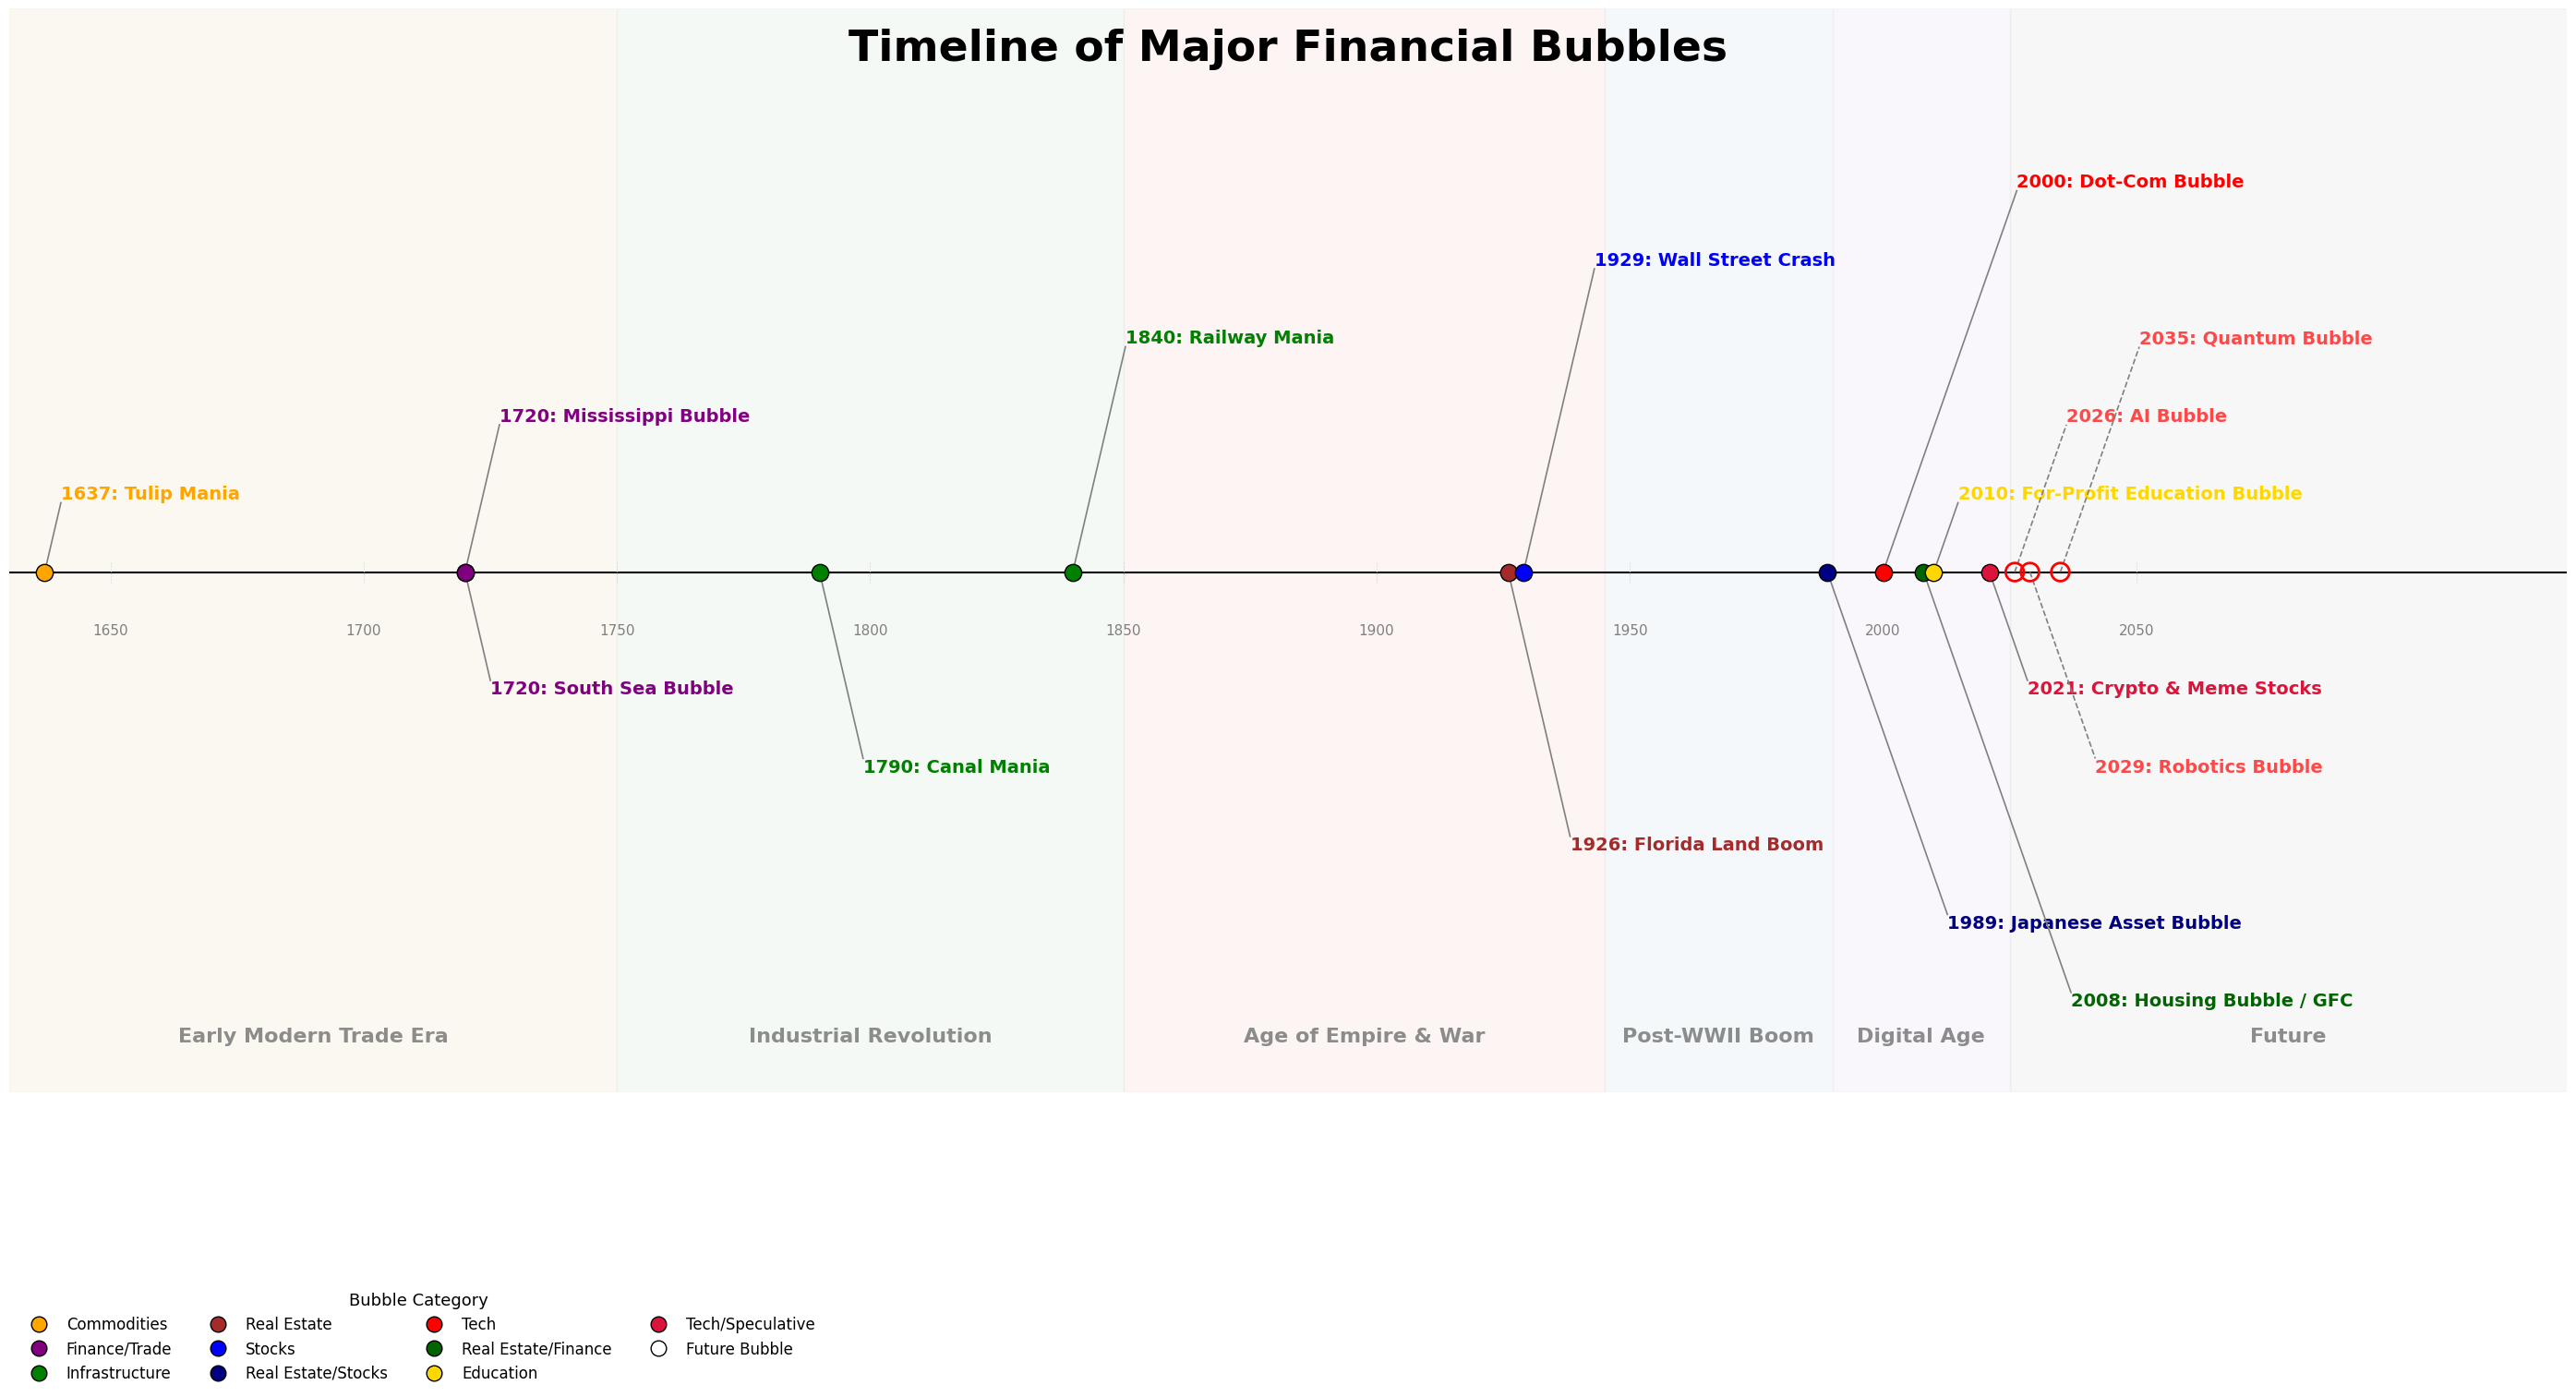

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Bubble events with year, label, category, and future flag
bubbles = [
    (1637, "Tulip Mania", "Commodities", False),
    (1720, "South Sea Bubble", "Finance/Trade", False),
    (1720, "Mississippi Bubble", "Finance/Trade", False),
    (1790, "Canal Mania", "Infrastructure", False),
    (1840, "Railway Mania", "Infrastructure", False),
    (1926, "Florida Land Boom", "Real Estate", False),
    (1929, "Wall Street Crash", "Stocks", False),
    (1989, "Japanese Asset Bubble", "Real Estate/Stocks", False),
    (2000, "Dot-Com Bubble", "Tech", False),
    (2008, "Housing Bubble / GFC", "Real Estate/Finance", False),
    (2010, "For-Profit Education Bubble", "Education", False),
    (2021, "Crypto & Meme Stocks", "Tech/Speculative", False),
    (2026, "AI Bubble", "Tech", True),
    (2029, "Robotics Bubble", "Tech", True),
    (2035, "Quantum Bubble", "Tech", True)
]

years, labels, categories, futures = zip(*bubbles)

# Colors by category
category_colors = {
    "Commodities": "orange",
    "Finance/Trade": "purple",
    "Infrastructure": "green",
    "Real Estate": "brown",
    "Stocks": "blue",
    "Real Estate/Stocks": "navy",
    "Tech": "red",
    "Real Estate/Finance": "darkgreen",
    "Education": "gold",
    "Tech/Speculative": "crimson"
}

# Make chart taller
fig, ax = plt.subplots(figsize=(28, 16))

# Start at 1630 for clarity
min_year, max_year = 1630, max(years) + 100

# Era bands and bottom labels
eras = [
    (1630, 1750, "Early Modern Trade Era", "#f0e6cc"),
    (1750, 1850, "Industrial Revolution", "#d6eadf"),
    (1850, 1945, "Age of Empire & War", "#f9d6d5"),
    (1945, 1990, "Post-WWII Boom", "#dbe5f1"),
    (1990, 2025, "Digital Age", "#efe1f7"),
    (2025, max_year, "Future", "#e0e0e0")
]
for start, end, label, color in eras:
    ax.axvspan(start, end, color=color, alpha=0.25, zorder=0)
    ax.text((start+end)/2, -10.5, label, ha="center", va="top",
            fontsize=16, fontweight="bold", color="gray", alpha=0.9)

# Baseline
ax.hlines(0, min_year, max_year, colors="black", linestyles="solid", linewidth=1.5)

# Markers
for year, label, cat, is_future in bubbles:
    if is_future:
        ax.scatter(year, 0, facecolors="none", edgecolors=category_colors[cat], s=200, linewidth=2, zorder=5)
    else:
        ax.scatter(year, 0, color=category_colors[cat], s=175, edgecolors="black", zorder=5)

# Decade markers
decades = np.arange(1650, 2060, 50)
for d in decades:
    ax.vlines(d, -0.25, 0.25, colors="lightgray", linestyles="dotted", linewidth=0.8)
    ax.text(d, -1.2, str(d), ha="center", va="top", fontsize=11, color="gray")

# Improved staggering with angled leader lines + collision spacing
placed = []
def collides(x, y, w=140, h=1.4):
    for p in placed:
        if abs(x - p["x"]) < (w + p["w"]) / 2 and abs(y - p["y"]) < (h + p["h"]) / 2:
            return True
    return False

for i, (year, label, cat, is_future) in enumerate(bubbles):
    base_level = 1.6 + (i % 10) * 0.9
    best = None
    for attempt in range(40):
        sign = 1 if (i + attempt) % 2 == 0 else -1
        level = sign * (base_level + 0.2 * (attempt // 4))
        dir_sign = 1 if (attempt % 2 == 0) else -1
        density_scale = 1.5 if 1980 <= year <= 2035 else 1.0
        angle_scale = density_scale * (2.0 + 0.3 * (attempt % 4))
        x_end = year + dir_sign * angle_scale * abs(level)
        y_end = level
        if x_end < min_year + 10 or x_end > max_year - 10:
            continue
        text_w = 6 * len(f"{year}: {label}")
        text_h = 1.0
        if not collides(x_end, y_end, w=text_w, h=text_h):
            best = (x_end, y_end, text_w, text_h, dir_sign, level)
            break
    if best is None:
        x_end, y_end, text_w, text_h = year, base_level, 120, 1.0
        linestyle = "dashed" if is_future else "solid"
        ax.plot([year, x_end], [0, y_end], color="gray", linewidth=1.2, linestyle=linestyle, zorder=3)
        ax.text(x_end, y_end, f"{year}: {label}", ha="center", va="bottom",
                fontsize=14, fontweight="semibold", color=category_colors[cat], alpha=0.7 if is_future else 1.0)
    else:
        x_end, y_end, text_w, text_h, dir_sign, level = best
        linestyle = "dashed" if is_future else "solid"
        ax.plot([year, x_end], [0, y_end], color="gray", linewidth=1.2, linestyle=linestyle, zorder=3)
        ha = "left" if dir_sign > 0 else "right"
        ax.text(x_end, y_end, f"{year}: {label}", ha=ha,
                va="bottom" if level > 0 else "top",
                fontsize=14, fontweight="semibold",
                color=category_colors[cat], alpha=0.7 if is_future else 1.0)
        placed.append({"x": x_end + (40 if ha == "left" else -40), "y": y_end, "w": text_w, "h": text_h})

# Title
fig.suptitle("Timeline of Major Financial Bubbles", fontsize=34, fontweight="bold", y=0.94)

# Legend
legend_elements = [plt.Line2D([0], [0], marker="o", color="w", label=cat,
                              markerfacecolor=col, markersize=12, markeredgecolor="black")
                   for cat, col in category_colors.items()]
legend_elements.append(plt.Line2D([0], [0], marker="o", color="w", label="Future Bubble",
                                  markerfacecolor="none", markeredgecolor="black", markersize=12, linestyle="--"))
ax.legend(handles=legend_elements, title="Bubble Category", loc="lower left",
          bbox_to_anchor=(0, -0.28), ncol=4, fontsize=12, title_fontsize=13, frameon=False)

# Layout
ax.axis("off")
ax.set_xlim(min_year, max_year)
ax.set_ylim(-12, 13)

plt.tight_layout()
plt.show()
